In [48]:
import numpy as np
import glob
import re
import shutil
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [49]:
#shutil.rmtree("/content/DataBase")

In [3]:
!unzip /content/DataBase.zip

Archive:  /content/DataBase.zip
   creating: DataBase/SETA/
  inflating: DataBase/SETA/healthy_open1.csv  
  inflating: DataBase/SETA/healthy_open10.csv  
  inflating: DataBase/SETA/healthy_open11.csv  
  inflating: DataBase/SETA/healthy_open12.csv  
  inflating: DataBase/SETA/healthy_open2.csv  
  inflating: DataBase/SETA/healthy_open3.csv  
  inflating: DataBase/SETA/healthy_open4.csv  
  inflating: DataBase/SETA/healthy_open5.csv  
  inflating: DataBase/SETA/healthy_open6.csv  
  inflating: DataBase/SETA/healthy_open7.csv  
  inflating: DataBase/SETA/healthy_open8.csv  
  inflating: DataBase/SETA/healthy_open9.csv  
   creating: DataBase/SETB/
  inflating: DataBase/SETB/healthy_closed1.csv  
  inflating: DataBase/SETB/healthy_closed10.csv  
  inflating: DataBase/SETB/healthy_closed11.csv  
  inflating: DataBase/SETB/healthy_closed12.csv  
  inflating: DataBase/SETB/healthy_closed2.csv  
  inflating: DataBase/SETB/healthy_closed3.csv  
  inflating: DataBase/SETB/healthy_closed4.csv  

In [4]:
files = glob.glob("/content/DataBase/*/*")

In [5]:
len(files)

48

In [6]:
def clean(path):
    df = pd.read_csv(path)

    for column in df.columns:
        if df[column].dtype == 'object':
            print("Sample : ",path," feature : ",column," is uncleaned")
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df[column] = df[column].fillna(method='ffill')
            df[column] = df[column].fillna(method='bfill')
    df = df.iloc[:1024,:]
    df.to_csv(path, index=False)

In [7]:
for i in files:
    clean(i)

Sample :  /content/DataBase/SETD/alzeimer_closed12.csv  feature :  18  is uncleaned
Sample :  /content/DataBase/SETC/alzeimer_open10.csv  feature :  0  is uncleaned
Sample :  /content/DataBase/SETC/alzeimer_open6.csv  feature :  0  is uncleaned
Sample :  /content/DataBase/SETC/alzeimer_open5.csv  feature :  0  is uncleaned
Sample :  /content/DataBase/SETC/alzeimer_open8.csv  feature :  0  is uncleaned
Sample :  /content/DataBase/SETA/healthy_open2.csv  feature :  16  is uncleaned
Sample :  /content/DataBase/SETA/healthy_open11.csv  feature :  14  is uncleaned
Sample :  /content/DataBase/SETB/healthy_closed6.csv  feature :  14  is uncleaned
Sample :  /content/DataBase/SETB/healthy_closed2.csv  feature :  16  is uncleaned


In [8]:
files = glob.glob("/content/DataBase/*/*")
len(files)

48

In [9]:
shutil.copytree("/content/DataBase","/content/DataBaseOriginal")

'/content/DataBaseOriginal'

In [10]:
def add_noise(path,label,file_no,target_dir):
    df = pd.read_csv(path)
    deviation = df.std().tolist()
    noise = np.random.normal([0]*19,deviation,19)
    df += noise/10
    file_name = label+str(file_no)+".csv"
    file_name = target_dir+"/"+file_name
    print(path," -> ",file_name)
    df.to_csv(file_name,index = False)

In [11]:
def add_noise_per_sample(path,label):
    file_no = 13
    all_files = glob.glob(path+"/*")
    for i in all_files:
        add_noise(i,label,file_no,path)
        file_no += 1
   

In [12]:
add_noise_per_sample("/content/DataBase/SETA",'healthy_open')

/content/DataBase/SETA/healthy_open10.csv  ->  /content/DataBase/SETA/healthy_open13.csv
/content/DataBase/SETA/healthy_open4.csv  ->  /content/DataBase/SETA/healthy_open14.csv
/content/DataBase/SETA/healthy_open2.csv  ->  /content/DataBase/SETA/healthy_open15.csv
/content/DataBase/SETA/healthy_open3.csv  ->  /content/DataBase/SETA/healthy_open16.csv
/content/DataBase/SETA/healthy_open5.csv  ->  /content/DataBase/SETA/healthy_open17.csv
/content/DataBase/SETA/healthy_open6.csv  ->  /content/DataBase/SETA/healthy_open18.csv
/content/DataBase/SETA/healthy_open11.csv  ->  /content/DataBase/SETA/healthy_open19.csv
/content/DataBase/SETA/healthy_open7.csv  ->  /content/DataBase/SETA/healthy_open20.csv
/content/DataBase/SETA/healthy_open1.csv  ->  /content/DataBase/SETA/healthy_open21.csv
/content/DataBase/SETA/healthy_open12.csv  ->  /content/DataBase/SETA/healthy_open22.csv
/content/DataBase/SETA/healthy_open8.csv  ->  /content/DataBase/SETA/healthy_open23.csv
/content/DataBase/SETA/health

In [13]:
add_noise_per_sample("/content/DataBase/SETB",'healthy_closed')

/content/DataBase/SETB/healthy_closed6.csv  ->  /content/DataBase/SETB/healthy_closed13.csv
/content/DataBase/SETB/healthy_closed10.csv  ->  /content/DataBase/SETB/healthy_closed14.csv
/content/DataBase/SETB/healthy_closed1.csv  ->  /content/DataBase/SETB/healthy_closed15.csv
/content/DataBase/SETB/healthy_closed8.csv  ->  /content/DataBase/SETB/healthy_closed16.csv
/content/DataBase/SETB/healthy_closed2.csv  ->  /content/DataBase/SETB/healthy_closed17.csv
/content/DataBase/SETB/healthy_closed11.csv  ->  /content/DataBase/SETB/healthy_closed18.csv
/content/DataBase/SETB/healthy_closed9.csv  ->  /content/DataBase/SETB/healthy_closed19.csv
/content/DataBase/SETB/healthy_closed7.csv  ->  /content/DataBase/SETB/healthy_closed20.csv
/content/DataBase/SETB/healthy_closed4.csv  ->  /content/DataBase/SETB/healthy_closed21.csv
/content/DataBase/SETB/healthy_closed3.csv  ->  /content/DataBase/SETB/healthy_closed22.csv
/content/DataBase/SETB/healthy_closed12.csv  ->  /content/DataBase/SETB/health

In [14]:
add_noise_per_sample("/content/DataBase/SETC",'alzeimer_open')

/content/DataBase/SETC/alzeimer_open9.csv  ->  /content/DataBase/SETC/alzeimer_open13.csv
/content/DataBase/SETC/alzeimer_open10.csv  ->  /content/DataBase/SETC/alzeimer_open14.csv
/content/DataBase/SETC/alzeimer_open6.csv  ->  /content/DataBase/SETC/alzeimer_open15.csv
/content/DataBase/SETC/alzeimer_open2.csv  ->  /content/DataBase/SETC/alzeimer_open16.csv
/content/DataBase/SETC/alzeimer_open3.csv  ->  /content/DataBase/SETC/alzeimer_open17.csv
/content/DataBase/SETC/alzeimer_open1.csv  ->  /content/DataBase/SETC/alzeimer_open18.csv
/content/DataBase/SETC/alzeimer_open11.csv  ->  /content/DataBase/SETC/alzeimer_open19.csv
/content/DataBase/SETC/alzeimer_open5.csv  ->  /content/DataBase/SETC/alzeimer_open20.csv
/content/DataBase/SETC/alzeimer_open7.csv  ->  /content/DataBase/SETC/alzeimer_open21.csv
/content/DataBase/SETC/alzeimer_open4.csv  ->  /content/DataBase/SETC/alzeimer_open22.csv
/content/DataBase/SETC/alzeimer_open8.csv  ->  /content/DataBase/SETC/alzeimer_open23.csv
/content

In [15]:
add_noise_per_sample("/content/DataBase/SETD",'alzeimer_closed')

/content/DataBase/SETD/alzeimer_closed9.csv  ->  /content/DataBase/SETD/alzeimer_closed13.csv
/content/DataBase/SETD/alzeimer_closed3.csv  ->  /content/DataBase/SETD/alzeimer_closed14.csv
/content/DataBase/SETD/alzeimer_closed11.csv  ->  /content/DataBase/SETD/alzeimer_closed15.csv
/content/DataBase/SETD/alzeimer_closed12.csv  ->  /content/DataBase/SETD/alzeimer_closed16.csv
/content/DataBase/SETD/alzeimer_closed7.csv  ->  /content/DataBase/SETD/alzeimer_closed17.csv
/content/DataBase/SETD/alzeimer_closed2.csv  ->  /content/DataBase/SETD/alzeimer_closed18.csv
/content/DataBase/SETD/alzeimer_closed8.csv  ->  /content/DataBase/SETD/alzeimer_closed19.csv
/content/DataBase/SETD/alzeimer_closed1.csv  ->  /content/DataBase/SETD/alzeimer_closed20.csv
/content/DataBase/SETD/alzeimer_closed6.csv  ->  /content/DataBase/SETD/alzeimer_closed21.csv
/content/DataBase/SETD/alzeimer_closed4.csv  ->  /content/DataBase/SETD/alzeimer_closed22.csv
/content/DataBase/SETD/alzeimer_closed5.csv  ->  /content/

In [16]:
def positive_shift(path,replace = False,value = 0):
    df = pd.read_csv(path)
    shift = random.randint(3,15)
    df = df.shift(shift)
    if replace:
       df = df.fillna(df.mean())
    df = df.fillna(0)      
    return df

def negative_shift(path,replace = False,value = 0):
    df = pd.read_csv(path)
    shift = random.randint(-15,-3)
    df = df.shift(shift)
    if replace:
       df = df.fillna(df.mean())
    df = df.fillna(0)   
    return df    

def shift(path,label,file_no,target_dir):
    pn = random.randint(0,1)
    if pn == 1:
        file_name = label+str(file_no)+".csv"
        file_name = target_dir+"/"+file_name
        df = positive_shift(path)
        print(path," -> ",file_name," Positive Shift")
        df.to_csv(file_name,index = False)
    else:
        file_name = label+str(file_no)+".csv"
        file_name = target_dir+"/"+file_name
        df = negative_shift(path)
        print(path," -> ",file_name," Negative Shift")
        df.to_csv(file_name,index = False)    


def add_shift_per_sample(path,label):
    file_no = 25
    all_files = glob.glob(path+"/*")
    for i in all_files:
        shift(i,label,file_no,path)
        file_no += 1
   

In [17]:
add_shift_per_sample("/content/DataBase/SETA",'healthy_open')

/content/DataBase/SETA/healthy_open10.csv  ->  /content/DataBase/SETA/healthy_open25.csv  Positive Shift
/content/DataBase/SETA/healthy_open4.csv  ->  /content/DataBase/SETA/healthy_open26.csv  Positive Shift
/content/DataBase/SETA/healthy_open19.csv  ->  /content/DataBase/SETA/healthy_open27.csv  Positive Shift
/content/DataBase/SETA/healthy_open2.csv  ->  /content/DataBase/SETA/healthy_open28.csv  Negative Shift
/content/DataBase/SETA/healthy_open3.csv  ->  /content/DataBase/SETA/healthy_open29.csv  Positive Shift
/content/DataBase/SETA/healthy_open5.csv  ->  /content/DataBase/SETA/healthy_open30.csv  Negative Shift
/content/DataBase/SETA/healthy_open6.csv  ->  /content/DataBase/SETA/healthy_open31.csv  Negative Shift
/content/DataBase/SETA/healthy_open11.csv  ->  /content/DataBase/SETA/healthy_open32.csv  Negative Shift
/content/DataBase/SETA/healthy_open7.csv  ->  /content/DataBase/SETA/healthy_open33.csv  Negative Shift
/content/DataBase/SETA/healthy_open1.csv  ->  /content/DataBa

In [18]:
add_shift_per_sample("/content/DataBase/SETB",'healthy_closed')

/content/DataBase/SETB/healthy_closed6.csv  ->  /content/DataBase/SETB/healthy_closed25.csv  Negative Shift
/content/DataBase/SETB/healthy_closed10.csv  ->  /content/DataBase/SETB/healthy_closed26.csv  Negative Shift
/content/DataBase/SETB/healthy_closed1.csv  ->  /content/DataBase/SETB/healthy_closed27.csv  Positive Shift
/content/DataBase/SETB/healthy_closed20.csv  ->  /content/DataBase/SETB/healthy_closed28.csv  Negative Shift
/content/DataBase/SETB/healthy_closed8.csv  ->  /content/DataBase/SETB/healthy_closed29.csv  Negative Shift
/content/DataBase/SETB/healthy_closed24.csv  ->  /content/DataBase/SETB/healthy_closed30.csv  Positive Shift
/content/DataBase/SETB/healthy_closed23.csv  ->  /content/DataBase/SETB/healthy_closed31.csv  Negative Shift
/content/DataBase/SETB/healthy_closed2.csv  ->  /content/DataBase/SETB/healthy_closed32.csv  Negative Shift
/content/DataBase/SETB/healthy_closed21.csv  ->  /content/DataBase/SETB/healthy_closed33.csv  Positive Shift
/content/DataBase/SETB/

In [19]:
add_shift_per_sample("/content/DataBase/SETC",'alzeimer_open')

/content/DataBase/SETC/alzeimer_open9.csv  ->  /content/DataBase/SETC/alzeimer_open25.csv  Negative Shift
/content/DataBase/SETC/alzeimer_open23.csv  ->  /content/DataBase/SETC/alzeimer_open26.csv  Negative Shift
/content/DataBase/SETC/alzeimer_open24.csv  ->  /content/DataBase/SETC/alzeimer_open27.csv  Positive Shift
/content/DataBase/SETC/alzeimer_open19.csv  ->  /content/DataBase/SETC/alzeimer_open28.csv  Positive Shift
/content/DataBase/SETC/alzeimer_open17.csv  ->  /content/DataBase/SETC/alzeimer_open29.csv  Negative Shift
/content/DataBase/SETC/alzeimer_open14.csv  ->  /content/DataBase/SETC/alzeimer_open30.csv  Positive Shift
/content/DataBase/SETC/alzeimer_open10.csv  ->  /content/DataBase/SETC/alzeimer_open31.csv  Negative Shift
/content/DataBase/SETC/alzeimer_open6.csv  ->  /content/DataBase/SETC/alzeimer_open32.csv  Negative Shift
/content/DataBase/SETC/alzeimer_open2.csv  ->  /content/DataBase/SETC/alzeimer_open33.csv  Positive Shift
/content/DataBase/SETC/alzeimer_open20.c

In [20]:
add_shift_per_sample("/content/DataBase/SETD",'alzeimer_closed')

/content/DataBase/SETD/alzeimer_closed9.csv  ->  /content/DataBase/SETD/alzeimer_closed25.csv  Positive Shift
/content/DataBase/SETD/alzeimer_closed3.csv  ->  /content/DataBase/SETD/alzeimer_closed26.csv  Negative Shift
/content/DataBase/SETD/alzeimer_closed11.csv  ->  /content/DataBase/SETD/alzeimer_closed27.csv  Positive Shift
/content/DataBase/SETD/alzeimer_closed12.csv  ->  /content/DataBase/SETD/alzeimer_closed28.csv  Positive Shift
/content/DataBase/SETD/alzeimer_closed7.csv  ->  /content/DataBase/SETD/alzeimer_closed29.csv  Positive Shift
/content/DataBase/SETD/alzeimer_closed24.csv  ->  /content/DataBase/SETD/alzeimer_closed30.csv  Negative Shift
/content/DataBase/SETD/alzeimer_closed2.csv  ->  /content/DataBase/SETD/alzeimer_closed31.csv  Negative Shift
/content/DataBase/SETD/alzeimer_closed8.csv  ->  /content/DataBase/SETD/alzeimer_closed32.csv  Negative Shift
/content/DataBase/SETD/alzeimer_closed17.csv  ->  /content/DataBase/SETD/alzeimer_closed33.csv  Positive Shift
/conte

In [21]:
def mean_roll(path,label,file_no,target_dir):
    df = pd.read_csv(path)
    window = random.randint(3,8)
    df = df.rolling(window = 5,center = True).mean().fillna(0)
    file_name = label+str(file_no)+".csv"
    file_name = target_dir+"/"+file_name
    print(path," -> ",file_name)
    df.to_csv(file_name,index = False)

def add_rolling_per_sample(path,label):
    file_no = 49
    all_files = glob.glob(path+"/*")
    for i in all_files:
        mean_roll(i,label,file_no,path)
        file_no += 1

In [22]:
add_rolling_per_sample("/content/DataBase/SETA",'healthy_open')

/content/DataBase/SETA/healthy_open27.csv  ->  /content/DataBase/SETA/healthy_open49.csv
/content/DataBase/SETA/healthy_open40.csv  ->  /content/DataBase/SETA/healthy_open50.csv
/content/DataBase/SETA/healthy_open41.csv  ->  /content/DataBase/SETA/healthy_open51.csv
/content/DataBase/SETA/healthy_open10.csv  ->  /content/DataBase/SETA/healthy_open52.csv
/content/DataBase/SETA/healthy_open4.csv  ->  /content/DataBase/SETA/healthy_open53.csv
/content/DataBase/SETA/healthy_open19.csv  ->  /content/DataBase/SETA/healthy_open54.csv
/content/DataBase/SETA/healthy_open45.csv  ->  /content/DataBase/SETA/healthy_open55.csv
/content/DataBase/SETA/healthy_open25.csv  ->  /content/DataBase/SETA/healthy_open56.csv
/content/DataBase/SETA/healthy_open48.csv  ->  /content/DataBase/SETA/healthy_open57.csv
/content/DataBase/SETA/healthy_open2.csv  ->  /content/DataBase/SETA/healthy_open58.csv
/content/DataBase/SETA/healthy_open3.csv  ->  /content/DataBase/SETA/healthy_open59.csv
/content/DataBase/SETA/h

In [23]:
add_rolling_per_sample("/content/DataBase/SETB",'healthy_closed')

/content/DataBase/SETB/healthy_closed6.csv  ->  /content/DataBase/SETB/healthy_closed49.csv
/content/DataBase/SETB/healthy_closed10.csv  ->  /content/DataBase/SETB/healthy_closed50.csv
/content/DataBase/SETB/healthy_closed1.csv  ->  /content/DataBase/SETB/healthy_closed51.csv
/content/DataBase/SETB/healthy_closed38.csv  ->  /content/DataBase/SETB/healthy_closed52.csv
/content/DataBase/SETB/healthy_closed20.csv  ->  /content/DataBase/SETB/healthy_closed53.csv
/content/DataBase/SETB/healthy_closed8.csv  ->  /content/DataBase/SETB/healthy_closed54.csv
/content/DataBase/SETB/healthy_closed44.csv  ->  /content/DataBase/SETB/healthy_closed55.csv
/content/DataBase/SETB/healthy_closed31.csv  ->  /content/DataBase/SETB/healthy_closed56.csv
/content/DataBase/SETB/healthy_closed40.csv  ->  /content/DataBase/SETB/healthy_closed57.csv
/content/DataBase/SETB/healthy_closed30.csv  ->  /content/DataBase/SETB/healthy_closed58.csv
/content/DataBase/SETB/healthy_closed48.csv  ->  /content/DataBase/SETB/h

In [24]:
add_rolling_per_sample("/content/DataBase/SETC",'alzeimer_open')

/content/DataBase/SETC/alzeimer_open9.csv  ->  /content/DataBase/SETC/alzeimer_open49.csv
/content/DataBase/SETC/alzeimer_open23.csv  ->  /content/DataBase/SETC/alzeimer_open50.csv
/content/DataBase/SETC/alzeimer_open34.csv  ->  /content/DataBase/SETC/alzeimer_open51.csv
/content/DataBase/SETC/alzeimer_open24.csv  ->  /content/DataBase/SETC/alzeimer_open52.csv
/content/DataBase/SETC/alzeimer_open19.csv  ->  /content/DataBase/SETC/alzeimer_open53.csv
/content/DataBase/SETC/alzeimer_open48.csv  ->  /content/DataBase/SETC/alzeimer_open54.csv
/content/DataBase/SETC/alzeimer_open45.csv  ->  /content/DataBase/SETC/alzeimer_open55.csv
/content/DataBase/SETC/alzeimer_open17.csv  ->  /content/DataBase/SETC/alzeimer_open56.csv
/content/DataBase/SETC/alzeimer_open14.csv  ->  /content/DataBase/SETC/alzeimer_open57.csv
/content/DataBase/SETC/alzeimer_open40.csv  ->  /content/DataBase/SETC/alzeimer_open58.csv
/content/DataBase/SETC/alzeimer_open10.csv  ->  /content/DataBase/SETC/alzeimer_open59.csv


In [25]:
add_rolling_per_sample("/content/DataBase/SETD",'alzeimer_closed')

/content/DataBase/SETD/alzeimer_closed26.csv  ->  /content/DataBase/SETD/alzeimer_closed49.csv
/content/DataBase/SETD/alzeimer_closed9.csv  ->  /content/DataBase/SETD/alzeimer_closed50.csv
/content/DataBase/SETD/alzeimer_closed3.csv  ->  /content/DataBase/SETD/alzeimer_closed51.csv
/content/DataBase/SETD/alzeimer_closed11.csv  ->  /content/DataBase/SETD/alzeimer_closed52.csv
/content/DataBase/SETD/alzeimer_closed12.csv  ->  /content/DataBase/SETD/alzeimer_closed53.csv
/content/DataBase/SETD/alzeimer_closed7.csv  ->  /content/DataBase/SETD/alzeimer_closed54.csv
/content/DataBase/SETD/alzeimer_closed24.csv  ->  /content/DataBase/SETD/alzeimer_closed55.csv
/content/DataBase/SETD/alzeimer_closed2.csv  ->  /content/DataBase/SETD/alzeimer_closed56.csv
/content/DataBase/SETD/alzeimer_closed35.csv  ->  /content/DataBase/SETD/alzeimer_closed57.csv
/content/DataBase/SETD/alzeimer_closed8.csv  ->  /content/DataBase/SETD/alzeimer_closed58.csv
/content/DataBase/SETD/alzeimer_closed36.csv  ->  /cont

In [26]:
shutil.make_archive('Augmented', 'zip','/content/DataBase')

'/content/Augmented.zip'

In [27]:
def return_splits():
    augmented_files = glob.glob("/content/DataBase/*/*")
    val_files = glob.glob("/content/DataBaseOriginal/*/*")
    train_files = list(set(augmented_files) - set(files))
    test_files = []
    for i in range(0,48,12):
        test_files += val_files[i:i+2]
    val_files = list(set(val_files) - set(test_files))  
    return train_files,val_files,test_files 
train,val,test = return_splits()     

In [28]:
def serialize_example(data,state,label):
    feature = {
               'data': tf.train.Feature(bytes_list = tf.train.BytesList(value = [data])),
               'state':tf.train.Feature(bytes_list = tf.train.BytesList(value = [state])),
               'label':tf.train.Feature(bytes_list = tf.train.BytesList(value = [label]))
               }

    feature = tf.train.Example(features = tf.train.Features(feature = feature))
    return feature.SerializeToString()


In [29]:
def write_records(rec_files,output_path):
    with tf.io.TFRecordWriter(output_path) as writer:
        for sample in rec_files:
            # Wave Data preparation
            data = pd.read_csv(sample).values
            data = tf.io.serialize_tensor(data.astype(np.float32)).numpy()
            label = sample.split("/")

            # Eye State & Label Preparation
            label = sample.split("/")[-1]
            label = re.sub("[0-9]","",label)
            label = label.split("_")
            eye_state = label[-1]
            label = label[0]

            # Eye State [1 - Eye Open ,0 - Eye Closed]
            if eye_state == 'closed':
                eye_state = np.array(0.0)
            else:
                eye_state = np.array(1.0)   

            # Label    [1 - Presence of AD , 0 - Healthy]
            if label == 'alzeimer':
                label = np.array(1.0)
            else :
                label = np.array(0.0)    
            
            label = tf.io.serialize_tensor(label.astype(np.float32)).numpy()
            eye_state = tf.io.serialize_tensor(eye_state.astype(np.float32)).numpy()

            # Writing to TF Records
            writer.write(serialize_example(data,eye_state,label))

In [30]:
write_records(train,"/content/train_rec")
write_records(test,"/content/test_rec")
write_records(val,"/content/val_rec")

In [31]:
def parse_example(example):
    feature = {
        'data' : tf.io.FixedLenFeature([],tf.string),
        'state': tf.io.FixedLenFeature([],tf.string),
        'label': tf.io.FixedLenFeature([],tf.string)
    }
    feature = tf.io.parse_single_example(example,feature)

    data = tf.io.parse_tensor(feature['data'],out_type = tf.float32)
    data = tf.reshape(data,(8,128,19))

    state = tf.io.parse_tensor(feature['state'],out_type = tf.float32)
    state = tf.reshape(state,(1,))

    label = tf.io.parse_tensor(feature['label'],out_type = tf.float32)
    label = tf.reshape(label,(1,))

    return data,state,label

In [32]:
def read_ds(ds):
    ds = tf.data.TFRecordDataset(ds)
    ds = ds.map(parse_example,num_parallel_calls = tf.data.experimental.AUTOTUNE)
    ds = ds.shuffle(80)
    ds = ds.batch(24)
    ds = ds.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    return ds

In [33]:
train_ds = read_ds("/content/train_rec")
for x,y,z in train_ds.take(1):
    print("Shape of Single Batch of Wave : ",x.numpy().shape)
    print("Shape of Single Batch of Eye State: ",y.numpy().shape)
    print("Shape of Single Batch of Labels : ",z.numpy().shape)

Shape of Single Batch of Wave :  (24, 8, 128, 19)
Shape of Single Batch of Eye State:  (24, 1)
Shape of Single Batch of Labels :  (24, 1)


In [43]:
def plot_wave(wave,label,eye_state):
    for i in range(19):
        wave_gr = wave[:,:,i].numpy().flatten()
        ax[i].plot(np.arange(0,1024,1),wave_gr)
        ax[i].set_title("Scalp : "+lobes[i])

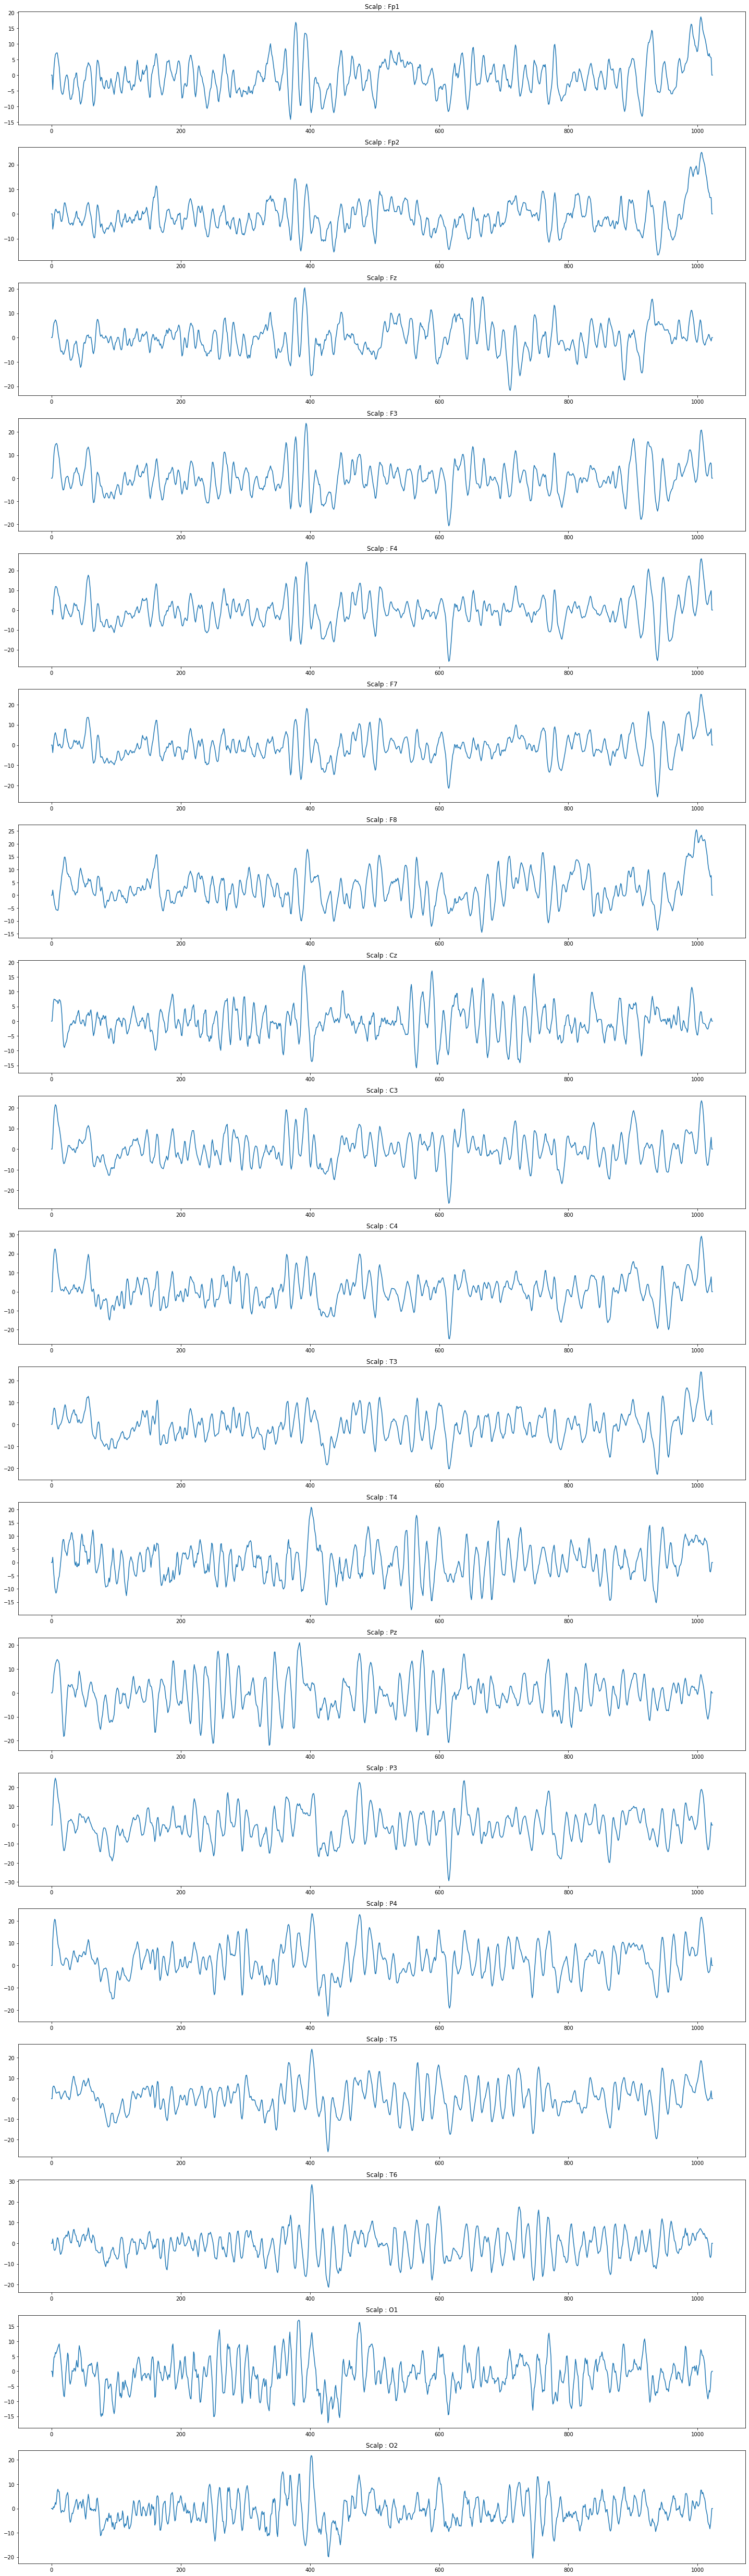

In [47]:
lobes = ('Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8','Cz', 'C3', 'C4', 'T3', 'T4', 'Pz', 'P3', 'P4', 'T5', 'T6', 'O1','O2')
fig,ax = plt.subplots(19,1,figsize = (25,90))
for x,y,z in train_ds.take(1):
    plot_wave(x[0]," "," ")